Import Libraries for LLMs

In [ ]:
# pip install openai langchain streamlit
# pip install ollama

In [1]:
import streamlit as st
import ollama

In [2]:
response = ollama.chat(model='llama3.2', messages=[
    {'role': 'user', 'content': 'สวีสดีครับ'},
])
print(response.message.content)

สวัสดีครับ สวีสดีด้วยนะครับ


In [3]:
prompt = "เมืองหลวงของประเทศไทยคือ"
response = ollama.chat(model='llama3.2',messages=[
    {'role' : 'system' , 'content' : 'You are male. Answer with ครับ' },
    {'role' : 'user' , 'content' : prompt},])
print(response['message']['content'])
response

กรุงเทพมหานคร ครับ


ChatResponse(model='llama3.2', created_at='2025-04-26T05:30:57.288168Z', done=True, done_reason='stop', total_duration=1631215000, load_duration=289709900, prompt_eval_count=40, prompt_eval_duration=19088500, eval_count=5, eval_duration=1321762400, message=Message(role='assistant', content='กรุงเทพมหานคร ครับ', images=None, tool_calls=None))

In [3]:
#test connect database
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    dbname="postgres",
    user="postgres",
    password="PASSWORD"
)

cur = conn.cursor()
cur.execute("SELECT version();")
print(cur.fetchone())

cur.close()
conn.close()


('PostgreSQL 17.4 on x86_64-windows, compiled by msvc-19.42.34436, 64-bit',)


In [6]:
#connect database
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    dbname="postgres",
    user="postgres",
    password="PASSWORD"
)

cur = conn.cursor()
cur.execute("""
            CREATE TABLE IF NOT EXISTS documents (
                id SERIAL PRIMARY KEY,
                content TEXT,
                embedding vector(1024)
            )
            """)
conn.commit()

cur.close()
conn.close()


In [12]:
import sympy.printing

In [4]:
from sentence_transformers import SentenceTransformer
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    dbname="postgres",
    user="postgres",
    password="PASSWORD"
)

cur = conn.cursor()

embedder = SentenceTransformer("BAAI/bge-m3")
def add_document(text):
    embedding = embedder.encode(text).tolist()
    cur.execute("INSERT INTO documents (content , embedding) VALUES (%s,%s)",(text,embedding))
    conn.commit()
    
# documents = [
#     "เปิดหลักสูตรระดับปริญญาตรี 5 สาขาวิชา ได้แก่ สาขาวิชาวิทยาการคอมพิวเตอร์ สาขาวิชานวัตกรรมดิจิทัล สาขาวิชาสารสนเทศการลงทุน สาขาวิชาคอมพิวเตอร์เกมและอีสปอร์ต และสาขาวิชาเทคโนโลยีสื่อสังคม",
#     "เปิดหลักสูตรระดับปริญญาโท 3 สาขาวิชา ได้แก่ สาขาวิชาการจัดการความมั่นคงไซเบอร์และเทคโนโลยี สาขาวิชาเทคโนโลยีสื่อสังคม สาขาการจัดการนวัตกรรมดิจิทัล",
#     "หลักสูตรระดับปริญญาโท สาขาการจัดการนวัตกรรมดิจิทัล เรียนแบบออนไลน์",
#     "หลักสูตรระดับปริญญาโท สาขาวิชาการจัดการความมั่นคงไซเบอร์และเทคโนโลยี และสาขาวิชาเทคโนโลยีสื่อสังคม เรียนเสาร์อาทิตย์",
#     "เปิดหลักสูตรระดับปริญญาเอก 2 สาขาวิชา ดังนี้ สาขาวิชาเทคโนโลยีสารสนเทศ และสาขาวิชาเทคโนโลยีสื่อสังคม",
#     "คณบดีคือ รศ.ดร. เชฏฐเนติ ศรีสอ้าน",
#     "วิทยาลัยเทคโนโลยีสารสนเทศและการสื่อสารแห่งมหาวิทยาลัยรังสิต ก่อตั้งเมื่อปี พ.ศ. 2537 ได้เปิดดำเนินการสอนทั้งในระดับปริญญาตรี ปริญญาโท และปริญญาเอกทางด้านสาขาวิชาที่เกี่ยวข้องทาง ด้านเทคโนโลยีสารสนเทศสำหรับกลุ่มนักศึกษา และคนทำงานที่มีพื้นฐานความรู้ที่หลากหลายและประสบการณ์ที่แตกต่างกัน เพื่อที่จะสามารถตอบสนองต่อความต้องการของสังคม",
#     "ปรัชญาคือเหนือกว่าด้วยเทคโนโลยี ก้าวสู่ระดับสากล ปณิธานคือมุ่งมั่นสร้างบัณฑิตไอทีมืออาชีพสู่สังคม และวิสัยทัศน์คือเป็นผู้นำด้านให้บริการการศึกษาทางด้านเทคโนโลยีสารสนเทศ โดยเน้นการวิจัยและสร้างพันธมิตรทางวิชาการเพื่อการพัฒนาอย่างยั่งยืน"
# ]
# documents = [
#     "ผมคือใครวะ",
#     "ผมคือไรบอกผมด้วย"
# ]
# documents = [
#     "ผมคือประธานบริษัทอะไรวะกรุํป",
#     "ผมคือไรฝากบอกถามด้วยนะ ไม่แน่ใจเหมือนกัน"
# ]
# for doc in documents:
#     add_document(doc)
cur.close()
conn.close()
# print(embedding)

C:\Users\TeetonLP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
C:\Users\TeetonLP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
def query_postgresql(query_text,k=2):
    query_embedding = embedder.encode(query_text).tolist()
    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        dbname="postgres",
        user="postgres",
        password="PASSWORD"
    )

    cur = conn.cursor()
    query_embedding_str = "[" + ",".join(map(str,query_embedding)) + "]"
    # print(query_embedding)
    sql_query = """
        SELECT content , embedding <=> %s::vector AS similarity_score
        FROM documents
        ORDER BY similarity_score ASC
        LIMIT %s;
    """
    cur.execute(sql_query,(query_embedding_str,k))
    results = cur.fetchall()
    cur.close()
    conn.close()
    return results
results = query_postgresql("ผมคือใคร")
# results

In [32]:
# import ollama
ollama.base_url = "http://localhost:11434"
def generate_response(query_text):
    retrieved_docs = query_postgresql(query_text,3)
    context = "\n".join([doc[0] for doc in retrieved_docs])
    # print(context)
    # prompt = f"Answer the question based on the following context:\n{context}\n\n Question: {query_text}"
    prompt = f"""
    You are a helpful assistant. Use the context below to answer the question. If the answer is not contained in the context, say \"Leave me alone\".
    context :\n{context}\n\n
    Question : {query_text}
    """
    
    # print(prompt)
    response = ollama.chat(model="llama3.2", messages=[
        {"role" : "system" , "content" : "You are an assistant.before answer will end with กูมั่วนะอย่าเชื่อ"},
        {"role" : "user" , "content" : prompt},
    ])
    return response['message']['content']
str_answer = generate_response("สวัสดี")
print(str_answer)

สวัสดีครับ/ค่ะ


In [7]:
len(embedding)

1024

Image to text

In [27]:
from PIL import Image
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open("4.jfif")).unsqueeze(0).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)

image_features /= image_features.norm(dim=-1, keepdim=True)

In [28]:
image_features.size()

torch.Size([1, 512])

In [5]:
#connect database
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    dbname="postgres",
    user="postgres",
    password="PASSWORD"
)

cur = conn.cursor()
cur.execute("""
            CREATE TABLE IF NOT EXISTS images (
                id SERIAL PRIMARY KEY,
                content TEXT,
                embedding vector(512)
            )
            """)
conn.commit()

cur.close()
conn.close()


In [29]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    dbname="postgres",
    user="postgres",
    password="PASSWORD"
)
cur = conn.cursor()

def add_image(text,vector):
    # embedding = embedder.encode(text).tolist()
    cur.execute("INSERT INTO images (content , embedding) VALUES (%s,%s)",(text,vector))
    conn.commit()
    

vector_list = image_features.squeeze(0).tolist()
add_image("พี่โต เทพแห่งชายชาตรี ",vector_list)
cur.close()
conn.close()


In [7]:
def query_postgresql_image(query_text,k=5):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    image = preprocess(Image.open(query_text)).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)

    image_features /= image_features.norm(dim=-1, keepdim=True)
    vector_list = image_features.squeeze(0).tolist()
    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        dbname="postgres",
        user="postgres",
        password="PASSWORD"
    )

    cur = conn.cursor()
    query_embedding_str = "[" + ",".join(map(str,vector_list)) + "]"
    # print(query_embedding)
    sql_query = """
        SELECT content , embedding <=> %s::vector AS similarity_score
        FROM images
        ORDER BY similarity_score ASC
        LIMIT %s;
    """
    cur.execute(sql_query,(query_embedding_str,k))
    results = cur.fetchall()
    cur.close()
    conn.close()
    return results

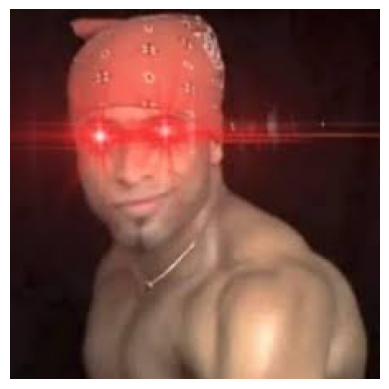

ตามข้อมูลที่มีอยู่ในบริบทนี้ พี่โต เทพแห่งชายชาตรี มีความสัมพันธ์กับแมว และมักจะถูกเรียกอีกอย่างหนึ่ง คือ "ตัวเหี้ยไรเนี่ย"


In [50]:
import ollama
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ollama.base_url = "http://localhost:11434"
def generate_response_image(query_text):
    retrieved_docs = query_postgresql_image(query_text,4)
    context = "\n".join([doc[0] for doc in retrieved_docs])
    # print(context)
    # prompt = f"Answer the question based on the following context:\n{context}\n\n Question: {query_text}"
    prompt = f"""
    You are a helpful assistant. Use the context below to answer the question. If the answer is not contained in the context, say \"Leave me alone\".
    context :\n{context}\n\n
    Question : คำตอบที่ได้จาก context เลิอกตอบอันแรกมา ตอบมาเลย
    """
    
    # print(prompt)
    response = ollama.chat(model="llama3.2", messages=[
        {"role" : "system" , "content" : "You are an assistant.before answer will end with กูมั่วนะอย่าเชื่อ"},
        {"role" : "user" , "content" : prompt},
    ])
    return response['message']['content']
text_i = "4.jfif"
image = mpimg.imread(text_i)
plt.imshow(image)
plt.axis('off')
plt.show()
str_answer = generate_response_image(text_i)
print(str_answer)